In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.models import Model
from keras.layers import Flatten,Dense

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img

In [2]:
base_model = MobileNet( input_shape=(224,224,3), include_top = False)

for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(units = 7, activation = 'softmax')(x)

model = Model(base_model.input, x)


In [3]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [4]:
model.compile(optimizer = 'adam', loss= 'categorical_crossentropy', metrics = ['accuracy'])

In [5]:
train = '/train1'

In [6]:
train_datagen = ImageDataGenerator(
        zoom_range = 0.2,
        shear_range = 0.2,
        horizontal_flip = True,
        rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "train1",
                                              target_size=(224,224),
                                              batch_size = 32,
                                    )
train_data.class_indices

Found 350 images belonging to 7 classes.


{'Angry': 0,
 'Disguist': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [7]:
val_datagen = ImageDataGenerator(rescale= 1/255)

val_data = val_datagen.flow_from_directory(directory = "train1",
                                          target_size=(224,224),
                                          batch_size = 32,
                            )

Found 350 images belonging to 7 classes.


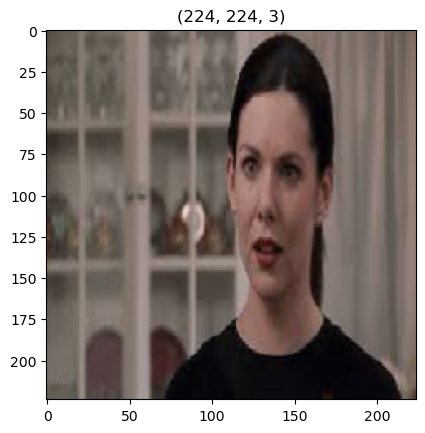

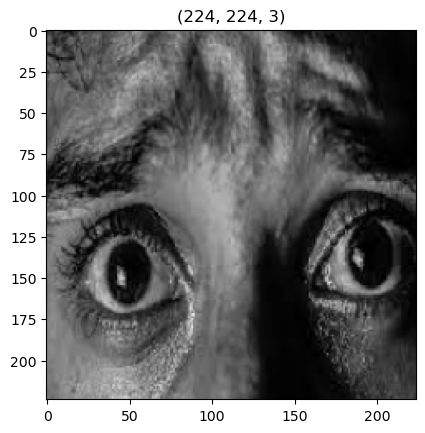

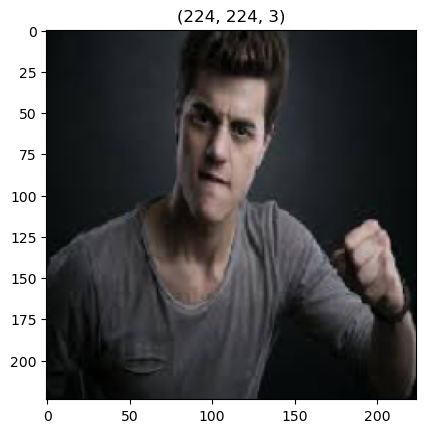

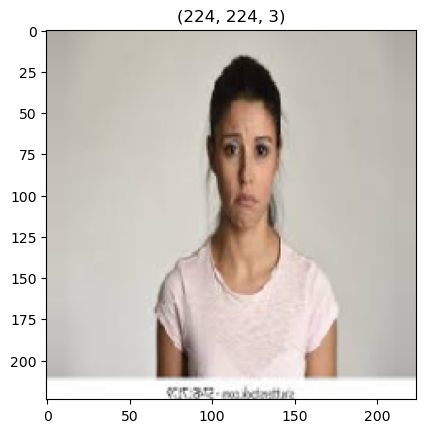

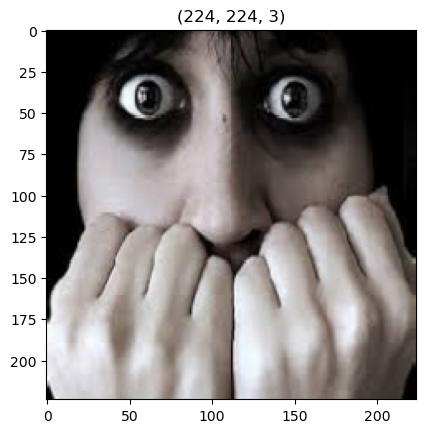

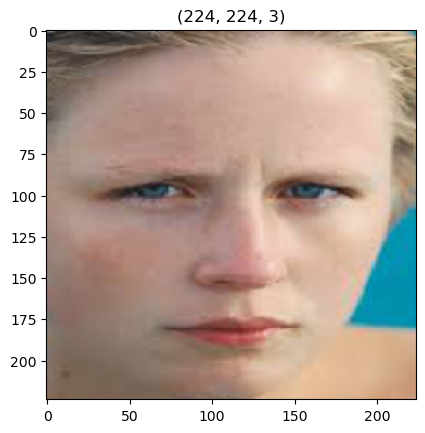

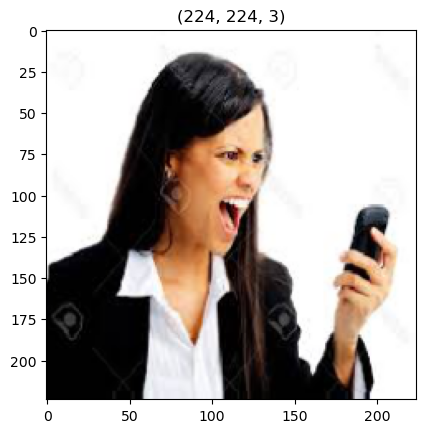

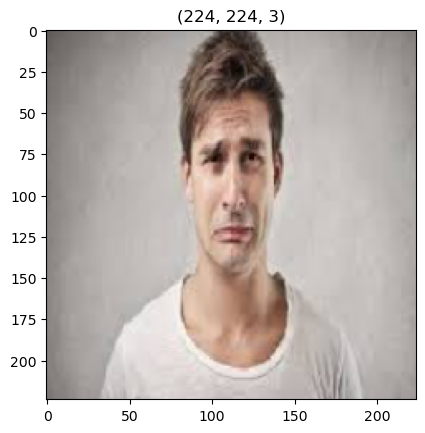

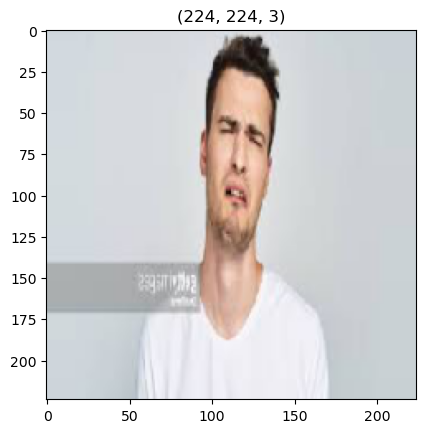

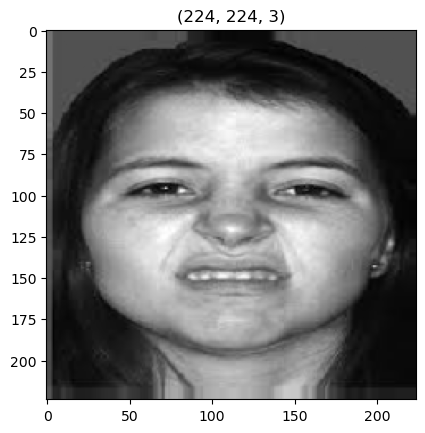

In [8]:
t_img, label = train_data.next()

def plotImages(img_arr,label):
    
    count = 0
    for im, l in zip(img_arr,label):
        plt.imshow(im)
        plt.title(im.shape)
        plt.axis = False
        plt.show()
        
        count += 1
        if count == 10:
            break

plotImages(t_img,label)

In [9]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

es = EarlyStopping(monitor="val_accuracy", min_delta = 0.01, patience = 5, verbose = 1, mode = 'auto')

mc = ModelCheckpoint(filepath = 'best_model.h5', monitor = 'val_accuracy', verbose = 1, save_best_only= True, mode = 'auto')

call_back = [es,mc]

In [17]:
hist = model.fit_generator(train_data,
                          steps_per_epoch= 10,
                          epochs = 30,
                          validation_data = val_data,
                          validation_steps = 8,
                          callbacks = [es,mc])

C:\Users\minh1\AppData\Local\Temp\ipykernel_17504\724589954.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_data,


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 0.0529 - accuracy: 0.9906
Epoch 1: val_accuracy improved from -inf to 0.98828, saving model to best_model.h5
10/10 [==============================] - 11s 1s/step - loss: 0.0529 - accuracy: 0.9906 - val_loss: 0.0441 - val_accuracy: 0.9883
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 0.0093 - accuracy: 0.9969
Epoch 2: val_accuracy improved from 0.98828 to 1.00000, saving model to best_model.h5
10/10 [==============================] - 11s 1s/step - loss: 0.0093 - accuracy: 0.9969 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 0.0317 - accuracy: 0.9874
Epoch 3: val_accuracy did not improve from 1.00000
10/10 [==============================] - 10s 1s/step - loss: 0.0317 - accuracy: 0.9874 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 0.0157 - accuracy: 0.9937
Epoch 4: val_accu

In [18]:
from keras.models import load_model
model = load_model("best_model.h5")

In [19]:
h = hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<function matplotlib.pyplot.show(close=None, block=None)>

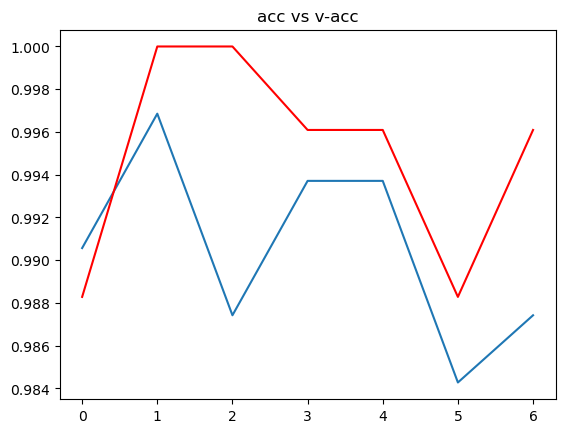

In [20]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c = 'red')
plt.title("acc vs v-acc")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

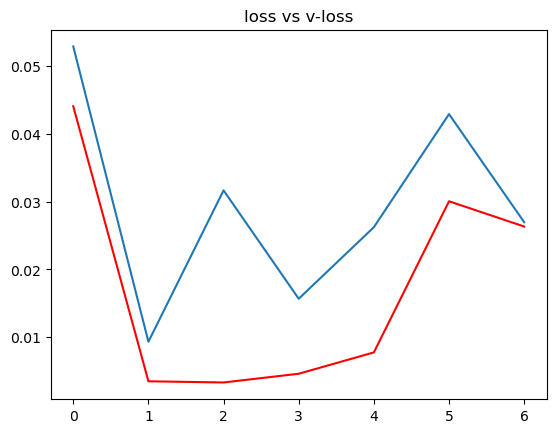

In [21]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c = 'red')
plt.title("loss vs v-loss")
plt.show

In [22]:
op = dict(zip(train_data.class_indices.values(),train_data.class_indices.keys()))

1/1 [==============================] - 0s 322ms/step
 the image is of Angry


<function matplotlib.pyplot.show(close=None, block=None)>

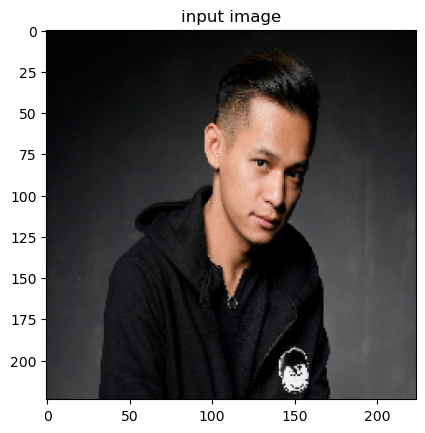

In [23]:
path = 'mixi.jpg'
img = load_img(path, target_size=(224,224))

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

plt.imshow(input_arr[0])
plt.title("input image")
plt.show